In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
card = pd.read_csv('card transactions.csv')

In [5]:
card.head(1)

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [6]:
card['date']=pd.to_datetime(card['date'], format='%Y-%m-%d')

In [7]:
card['card']=card['card'].astype(str)

In [8]:
card.dtypes

record                 int64
card                  object
date          datetime64[ns]
merch#                object
merchdes              object
merchstate            object
merchzip             float64
transtype             object
amount               float64
fraud                  int64
dtype: object

# Data Cleaning

## Removing outliers

In [9]:
card.shape

(96753, 10)

In [10]:
card=card[card['amount']<max(card['amount'])]

In [11]:
card.shape

(96752, 10)

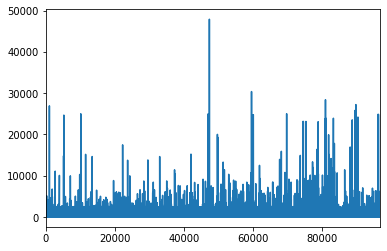

In [12]:
card['amount'].plot()

## Removing transaction types rather than p

In [13]:
card['transtype'].unique()

array(['P', 'D', 'A', 'Y'], dtype=object)

In [14]:
card=card[card['transtype']=='P']

In [15]:
card.shape

(96397, 10)

# Filling Missing Value
1. merch#
2. merchstate
3. merchzip
4. card -- verified, nothing to clean

In [16]:
original = card.copy()

In [17]:
import re

In [19]:
cardnum=card['card'].value_counts()
probc=[]
for c in pd.Series(cardnum.index):
    if re.findall(r'^[0-9]{10}$', c)==[]:
        probc.append(c)
probc


[]

## merchnum

In [20]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [80]:
card['merch#']=original['merch#']

### Filling merchnum with merchdes

In [81]:
merchnumnull=card[card['merch#'].isnull()==True]
merchnumgood=card[card['merch#'].isnull()==False]

In [82]:
merchnumnull.head()

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
115,116,5142182128,2010-01-03,NaN,GRAINGER #973,IL,60089,P,327.34,0
135,136,5142126842,2010-01-03,NaN,AUTOMATED OFFICE PRODU,MD,20706,P,2110.00,0
168,169,5142132574,2010-01-03,NaN,ROLL CALL NEWSPAPER,DC,20001,P,104.69,0
201,202,5142140436,2010-01-03,NaN,MONTGOMERY COLLEGE-PHONE,MD,20850,P,266.00,0
257,258,5142257292,2010-01-04,NaN,ARGENT CHEMICAL LABS,WA,98052,P,240.00,0


In [83]:
merchnumnull.shape

(3198, 10)

In [84]:
merchnumgood.shape

(93199, 10)

In [85]:
card.shape

(96397, 10)

In [68]:
merchnum={}
for nulldes in merchnumnull['merchdes'].unique():
    merchnum[nulldes]=[]
    for gooddes in merchnumgood['merchdes'].unique():
        score=fuzz.ratio(nulldes, gooddes)
        if score>=90:
            merchnum[nulldes].append([gooddes, score, merchnumgood[merchnumgood['merchdes']==gooddes]['record'].iloc[0]])

In [69]:
merchnum

{'GRAINGER #973': [['GRAINGER #935', 92, 8690],
  ['GRAINGER #930', 92, 44056],
  ['GRAINGER #973', 100, 44960],
  ['GRAINGER #937', 92, 45103],
  ['GRAINGER #967', 92, 46395],
  ['GRAINGER #932', 92, 51047],
  ['GRAINGER #931', 92, 53922],
  ['GRAINGER #933', 92, 56433],
  ['GRAINGER #193', 92, 69190],
  ['GRAINGER #897', 92, 71899]],
 'AUTOMATED OFFICE PRODU': [['AUTOMATED OFFICE PRODU', 100, 48184]],
 'ROLL CALL NEWSPAPER': [['ROLL CALL NEWSPAPER', 100, 51955]],
 'MONTGOMERY COLLEGE-PHONE': [],
 'ARGENT CHEMICAL LABS': [['ARGENT CHEMICAL LABS', 100, 72147]],
 'CHEMUNEX': [['CHEMUNEX', 100, 50184]],
 'RETAIL DEBIT ADJUSTMENT': [],
 'TEKMAR COMPANY': [['TEKMAR COMPANY', 100, 44134]],
 'OPERON TECHNOLOGIES INC': [['OPERON TECHNOLOGIES INC', 100, 45566]],
 'RETAIL CREDIT ADJUSTMENT': [],
 'PACKAGE PLACE  THE': [],
 'CUBIX CORPORATION': [],
 'SIGNAL GRAPHICS PRINTING': [],
 'GRAINGER #932': [['GRAINGER #935', 92, 8690],
  ['GRAINGER #192', 92, 43967],
  ['GRAINGER #930', 92, 44056],
  ['

In [74]:
card[card['merchdes']=='THE CONFERENCE BOARD']

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
11254,11255,5142122832,2010-02-16,NaN,THE CONFERENCE BOARD,NY,10022.0,P,1218.0,0
15509,15510,5142295209,2010-03-03,NaN,THE CONFERENCE BOARD,NY,10022.0,P,1414.0,0
41116,41117,5142277818,2010-06-02,NaN,THE CONFERENCE BOARD,NY,10022.0,P,40.0,0
60399,60400,5142214551,2010-08-07,06-3666883468,THE CONFERENCE BOARD,NY,10022.0,P,45.0,0
81392,81393,5142283322,2010-10-14,NaN,THE CONFERENCE BOARD,NY,10022.0,P,638.0,0


In [86]:
for nulldes in merchnumnull['merchdes'].unique():
    for gooddes in merchnumgood['merchdes'].unique():
        score=fuzz.ratio(nulldes, gooddes)
        if score==100:
            indexnum = merchnumnull[merchnumnull['merchdes']==gooddes].index
            matchnum = list(merchnumgood[merchnumgood['merchdes']==gooddes].index)[0]
            for i in indexnum:
                card.loc[i, 'merch#']=card.loc[matchnum, 'merch#']
            break

In [87]:
card[card['merchdes']=='BREDE EXPOSITION SERVICES']

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
12706,12707,5142257777,2010-02-22,08-0002815224,BREDE EXPOSITION SERVICES,CO,80216,P,389.5,0
27063,27064,5142119910,2010-04-13,08-0002815224,BREDE EXPOSITION SERVICES,CO,80216,P,76.0,0
82843,82844,5142150919,2010-10-22,08-0002815224,BREDE EXPOSITION SERVICES,CO,80216,P,113.2,0
84547,84548,5142150919,2010-11-02,08-0002815224,BREDE EXPOSITION SERVICES,CO,80216,P,7.7,0


In [88]:
card.count()

record        96397
card          96397
date          96397
merch#        94359
merchdes      96397
merchstate    96096
merchzip      96397
transtype     96397
amount        96397
fraud         96397
dtype: int64

### Filling merchnum with record

In [89]:
for i in card[card['merch#'].isnull()==True].index:
    for j in card[(card['merch#'].isnull()==True)&(card['merchdes']==card.loc[i,'merchdes'])].index:
        card.loc[j,'merch#']=card.loc[i,'record']

In [90]:
card.count()

record        96397
card          96397
date          96397
merch#        96397
merchdes      96397
merchstate    96096
merchzip      96397
transtype     96397
amount        96397
fraud         96397
dtype: int64

## merchstate

### Filling merchstate with merchdes

In [91]:
statenull=card[card['merchstate'].isnull()==True]
stategood=card[card['merchstate'].isnull()==False]

In [92]:
for null in statenull['merchdes'].unique():
    for good in stategood['merchdes'].unique():
        if null==good:
            indexnum = statenull[statenull['merchdes']==good].index
            matchnum = list(stategood[stategood['merchdes']==good].index)[0]
            for i in indexnum:
                card.loc[i, 'merchstate']=card.loc[matchnum, 'merchstate']
            break

In [93]:
card.count()

record        96397
card          96397
date          96397
merch#        96397
merchdes      96397
merchstate    96104
merchzip      96397
transtype     96397
amount        96397
fraud         96397
dtype: int64

### Filling merchstate with merchnum

In [94]:
statenull2=card[card['merchstate'].isnull()==True]
stategood2=card[card['merchstate'].isnull()==False]

In [95]:
for null in statenull2['merch#'].unique():
    for good in stategood2['merch#'].unique():
        if null==good:
            indexnum = statenull2[statenull2['merch#']==good].index
            matchnum = list(stategood2[stategood2['merch#']==good].index)[0]
            for i in indexnum:
                card.loc[i, 'merchstate']=card.loc[matchnum, 'merchstate']
            break

In [96]:
card.count()

record        96397
card          96397
date          96397
merch#        96397
merchdes      96397
merchstate    96104
merchzip      96397
transtype     96397
amount        96397
fraud         96397
dtype: int64

### Filling merchstate with merchzip

In [97]:
statenull3=card[card['merchstate'].isnull()==True]
stategood3=card[card['merchstate'].isnull()==False]

for null in statenull3['merchzip'].unique():
    for good in stategood3['merchzip'].unique():
        if null==good:
            indexnum = statenull3[statenull3['merchzip']==good].index
            matchnum = list(stategood3[stategood3['merchzip']==good].index)[0]
            for i in indexnum:
                card.loc[i, 'merchstate']=card.loc[matchnum, 'merchstate']
            break

In [98]:
card.count()

record        96397
card          96397
date          96397
merch#        96397
merchdes      96397
merchstate    96342
merchzip      96397
transtype     96397
amount        96397
fraud         96397
dtype: int64

### Changing merchzip format

In [99]:
card['merchzip']=original['merchzip'].astype(str).str[:-2]

In [100]:
card.head()

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0


In [101]:
card[(card['merchstate'].isnull()==True)&(card['merchzip']!='n')]

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
3258,3259,5142153880,2010-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2340.00,0
3262,3263,5142154098,2010-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2387.00,0
3540,3541,5142154098,2010-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2300.00,0
3642,3643,5142153880,2010-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2500.00,0
4969,4970,5142194136,2010-01-24,597597721468,CRISTALIA ACQUISITION COR,NaN,929,P,83.00,0
5229,5230,5142194136,2010-01-24,597597721468,CRISTALIA ACQUISITION COR,NaN,929,P,480.00,0
5636,5637,5142153880,2010-01-26,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2300.00,0
5900,5901,5142190418,2010-01-27,5901,ATOMIC ENERGY AGENCY,NaN,1400,P,40.00,0
6030,6031,5142153880,2010-01-27,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,565.00,0
6136,6137,5142272703,2010-01-27,6137,SHENAV HADRAHOT,NaN,65132,P,199.00,0


In [72]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


In [102]:
for i in card[(card['merchstate'].isnull()==True)&(card['merchzip']!='n')].index:
    zipcode=card.loc[i, 'merchzip']
    if len(zipcode)==5:
        info = search.by_zipcode(zipcode)
        if info.state is not None:
            card.loc[i, 'merchstate']=info.state
        print(info)

SimpleZipcode(zipcode=None, zipcode_type=None, major_city=None, post_office_city=None, common_city_list=None, county=None, state=None, lat=None, lng=None, timezone=None, radius_in_miles=None, area_code_list=None, population=None, population_density=None, land_area_in_sqmi=None, water_area_in_sqmi=None, housing_units=None, occupied_housing_units=None, median_home_value=None, median_household_income=None, bounds_west=None, bounds_east=None, bounds_north=None, bounds_south=None)
SimpleZipcode(zipcode=None, zipcode_type=None, major_city=None, post_office_city=None, common_city_list=None, county=None, state=None, lat=None, lng=None, timezone=None, radius_in_miles=None, area_code_list=None, population=None, population_density=None, land_area_in_sqmi=None, water_area_in_sqmi=None, housing_units=None, occupied_housing_units=None, median_home_value=None, median_household_income=None, bounds_west=None, bounds_east=None, bounds_north=None, bounds_south=None)
SimpleZipcode(zipcode=None, zipcode_ty

In [103]:
card.count()

record        96397
card          96397
date          96397
merch#        96397
merchdes      96397
merchstate    96342
merchzip      96397
transtype     96397
amount        96397
fraud         96397
dtype: int64

In [104]:
card[(card['merchstate'].isnull()==True)&(card['merchzip']!='n')]

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
3258,3259,5142153880,2010-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2340.00,0
3262,3263,5142154098,2010-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2387.00,0
3540,3541,5142154098,2010-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2300.00,0
3642,3643,5142153880,2010-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2500.00,0
4969,4970,5142194136,2010-01-24,597597721468,CRISTALIA ACQUISITION COR,NaN,929,P,83.00,0
5229,5230,5142194136,2010-01-24,597597721468,CRISTALIA ACQUISITION COR,NaN,929,P,480.00,0
5636,5637,5142153880,2010-01-26,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2300.00,0
5900,5901,5142190418,2010-01-27,5901,ATOMIC ENERGY AGENCY,NaN,1400,P,40.00,0
6030,6031,5142153880,2010-01-27,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,565.00,0
6136,6137,5142272703,2010-01-27,6137,SHENAV HADRAHOT,NaN,65132,P,199.00,0


In [107]:
card[card['merchstate'].isnull()==True]

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
3258,3259,5142153880,2010-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2340.00,0
3262,3263,5142154098,2010-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2387.00,0
3540,3541,5142154098,2010-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2300.00,0
3642,3643,5142153880,2010-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2500.00,0
4969,4970,5142194136,2010-01-24,597597721468,CRISTALIA ACQUISITION COR,NaN,929,P,83.00,0
5229,5230,5142194136,2010-01-24,597597721468,CRISTALIA ACQUISITION COR,NaN,929,P,480.00,0
5636,5637,5142153880,2010-01-26,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2300.00,0
5900,5901,5142190418,2010-01-27,5901,ATOMIC ENERGY AGENCY,NaN,1400,P,40.00,0
6030,6031,5142153880,2010-01-27,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,565.00,0
6136,6137,5142272703,2010-01-27,6137,SHENAV HADRAHOT,NaN,65132,P,199.00,0


In [108]:
for i in card[card['merchstate'].isnull()==True].index:
    card.loc[i,'merchstate']=card.loc[i,'merchzip']

In [109]:
card.count()

record        96397
card          96397
date          96397
merch#        96397
merchdes      96397
merchstate    96397
merchzip      96397
transtype     96397
amount        96397
fraud         96397
dtype: int64

## merchzip

In [113]:
card[card['merchzip']=='n'].head()

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
51,52,5142204384,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,n,P,20.15,0
54,55,5142146340,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,n,P,23.90,0
55,56,5142260984,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,n,P,19.95,0
58,59,5142204384,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,n,P,20.15,0
59,60,5142204384,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,n,P,20.15,0


### Filling merchzip with merchdes

In [114]:
zipnull=card[card['merchzip']=='n']
zipgood=card[card['merchzip']!='n']

In [115]:
for null in zipnull['merchdes'].unique():
    for good in zipgood['merchdes'].unique():
        if null==good:
            indexnum = zipnull[zipnull['merchdes']==good].index
            matchnum = list(zipgood[zipgood['merchdes']==good].index)[0]
            for i in indexnum:
                card.loc[i, 'merchzip']=card.loc[matchnum, 'merchzip']
            break

In [116]:
zipnull.shape

(4300, 10)

### Filling merchzip with recordnum

In [117]:
for i in card[card['merchzip']=='n'].index:
    for j in card[(card['merchzip']=='n')&(card['merchdes']==card.loc[i,'merchdes'])].index:
        card.loc[j,'merchzip']=card.loc[i,'record']

In [118]:
card.count()

record        96397
card          96397
date          96397
merch#        96397
merchdes      96397
merchstate    96397
merchzip      96397
transtype     96397
amount        96397
fraud         96397
dtype: int64

In [119]:
card.to_csv('clean data.csv', index=False)

In [120]:
checkout=pd.read_csv('clean data.csv')
checkout.head()

,record,card,date,merch#,merchdes,merchstate,merchzip,transtype,amount,fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0


# Variable Creation

1. Day of week risk variable

The following variables need to all look back in time:

2. Benford's Law variable (remove Fedex records for this)
3. Amount variable
4. Frequency variable
5. Days-since variable
6. Velocity change variable